In [2]:
%matplotlib inline
from sklearn.linear_model import LogisticRegression
import numpy as np
from math import e, log
import matplotlib.pyplot as plt
import pickle
from collections import Counter

#print list(zip(*[1,2,3,4,5]))

xs = np.asarray([[1], [2], [3], [4], [5]])
print xs
ys = np.asarray([1,1,0,0,0])

l = LogisticRegression()

l.fit(xs, ys)

print l.coef_
print l.intercept_

[[1]
 [2]
 [3]
 [4]
 [5]]
[[-0.49217379]]
[ 0.51679117]


In [28]:
## load category and overlap data

with open('regression_form.p') as handle:
    form_dat = pickle.load(handle)
    
with open('regression_lexical.p') as handle:
    lex_dat = pickle.load(handle)


print lex_dat.keys()    
print len(lex_dat['alignment e'])

['alignment e', 'alignment p', 'coherence e', 'coherence p']
343


In [56]:
from collections import Counter
for cond_dict in (form_dat, lex_dat):
    print '############################################'
    for key, var_dat in cond_dict.iteritems():
        print '---', key, '---'
        bin_var = [(1 if val > .5 else 0 if val < .5 else .5, succ) for val, succ in var_dat]
        
        succ_counts = Counter([succ for _, succ in bin_var])
        succ_probs = {succ : float(succ_count)/sum(succ_counts.values()) for succ, succ_count in succ_counts.iteritems()}
        print succ_probs
        print
        
        bin_val_counts = Counter([val for val, _ in bin_var])
        bin_val_probs = {bin_val : float(bin_val_count)/sum(bin_val_counts.values()) 
                         for bin_val, bin_val_count in bin_val_counts.iteritems()}
        print bin_val_probs
        print
        
        bin_var_counts = Counter(bin_var)
        bin_var_probs = {tup : float(var_count)/sum(bin_var_counts.values()) 
                         for tup, var_count in bin_var_counts.iteritems()}
        print bin_var_probs
        print
        
        bin_cond_probs = {tup : joint_prob/bin_val_probs[tup[0]]  for tup, joint_prob in bin_var_probs.iteritems()}
        print bin_cond_probs
        print
    print

############################################
--- alignment e ---
{'incorrect': 0.21610169491525424, 'not_moved': 0.2796610169491525, 'correct': 0.5042372881355932}

{0: 0.5, 1: 0.4364406779661017, 0.5: 0.0635593220338983}

{(0, 'incorrect'): 0.09745762711864407, (0, 'correct'): 0.2754237288135593, (0.5, 'incorrect'): 0.0211864406779661, (0, 'not_moved'): 0.1271186440677966, (1, 'not_moved'): 0.15254237288135594, (1, 'correct'): 0.1864406779661017, (1, 'incorrect'): 0.09745762711864407, (0.5, 'correct'): 0.0423728813559322}

{(0, 'incorrect'): 0.19491525423728814, (0.5, 'correct'): 0.6666666666666666, (0.5, 'incorrect'): 0.3333333333333333, (0, 'not_moved'): 0.2542372881355932, (1, 'not_moved'): 0.34951456310679613, (1, 'correct'): 0.42718446601941745, (1, 'incorrect'): 0.22330097087378642, (0, 'correct'): 0.5508474576271186}

--- alignment p ---
{'incorrect': 0.21649484536082475, 'not_moved': 0.23711340206185566, 'correct': 0.5463917525773195}

{0: 0.5154639175257731, 1: 0.402061855670

In [31]:
cond_dict = form_dat
key_strs = ['alignment e', 'alignment p', 'coherence e', 'coherence p']
regress_cond_dict = {s:0 for s in key_strs}
for key_str in key_strs:
    var = cond_dict[key_str]
    var_vals, var_succs = list(zip(*var))

    print key_str
    print 'range: ', min(var_vals), max(var_vals)

    var_vals = [[meas] for meas in var_vals]

    #incorrect: 0, not_moved: 1, correct: 2
    conv_f = lambda succ_lvl: 0 if succ_lvl == 'incorrect' else (1 if succ_lvl == 'not_moved' else 2)
    conv_f_inv = lambda succ_lvl: 'incorrect' if succ_lvl == 0 else ('not_moved' if succ_lvl == 1 else 'correct')

    var_succs = map(conv_f, var_succs)

    #print align_e_succs[:10]

    #print len(align_e_vals)

    #print set(align_e_succs)

    l = LogisticRegression() #(multi_class='multinomial', solver='lbfgs')

    l.fit(var_vals, var_succs)

    regress_cond_dict[key_str] = l
    
    print l.predict([1.0])
    print l.coef_
    print l.intercept_
    print 

alignment e
range:  0.0 1.0
[2]
[[-0.0446619 ]
 [ 0.42492473]
 [-0.39347808]]
[-1.23758752 -1.12482725  0.19320615]

alignment p
range:  0.0 1.0
[2]
[[-0.24498142]
 [-0.29677719]
 [ 0.31982477]]
[-1.14733326 -1.0140519   0.04532195]

coherence e
range:  0.0 1.38629436112
[2]
[[ 0.06480246]
 [-0.19037464]
 [ 0.06366158]]
[-1.11338163 -0.98040824 -0.05024146]

coherence p
range:  0.0 1.56071040904
[2]
[[-0.2614496 ]
 [-0.60160729]
 [ 0.61291702]]
[-1.4312225  -0.79919443  0.00345958]



C:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationW

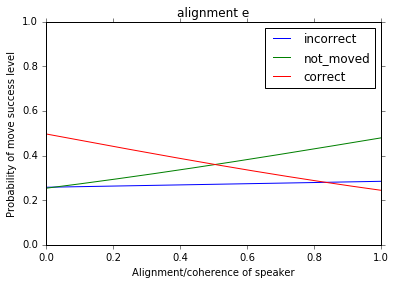

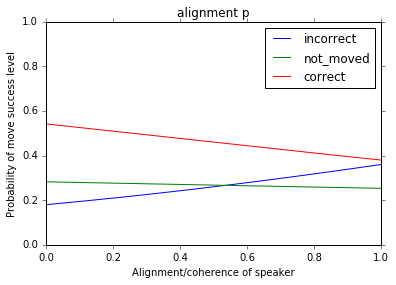

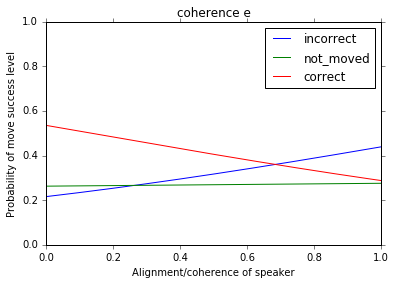

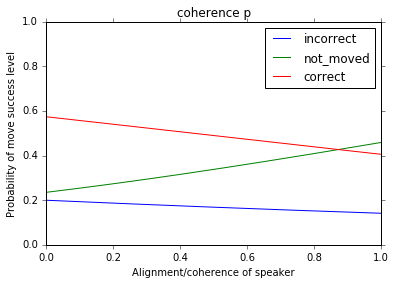

In [21]:
for key, regress in sorted(regress_cond_dict.iteritems()): 
    for i in range(3):
        coef = regress.coef_[i, 0]
        inter = regress.intercept_[i]

        range_lo = 0
        range_hi = 1
        x_ls = [x for x in np.arange(range_lo, range_hi, 0.0001)]

        logit = lambda x: float(1)/(1+e**-(inter + coef*x))

        y_ls = [logit(x) for x in x_ls]
        
        plt.plot(x_ls, y_ls, label=str(conv_f_inv(i)))
        plt.axis([range_lo, range_hi, 0, 1])
        plt.title(key)
        plt.xlabel('Alignment/coherence of speaker')
        plt.ylabel('Probability of move success level')
    plt.legend()
    plt.show()


In [23]:
#goodness-of-fit analysis
# generalised R^2: 1 - (L(0)/L(\theta))^(2/n)

logit = lambda beta_0, beta_1: lambda x: float(1)/(1+e**-(beta_0 + beta_1*x))


unif_logit = lambda beta_0: logit(beta_0, 0)

#regress_cond_dict
#var_vals, var_succs

for key_str, log_regress in regress_cond_dict.iteritems():
    fitted_inter = log_regress.intercept_
    fitted_coef = log_regress.coef_
    
    print '---', key_str, '---'
    print 'inter: ', fitted_inter
    print 'coef: ', fitted_coef
            
    logit_cur_regress = logit(fitted_inter, fitted_coef)
    unif_logit_cur_regress =unif_logit(fitted_inter)
    
    var = cond_dict[key_str]
    var_vals, var_succs = list(zip(*var))

    #incorrect: 0, not_moved: 1, correct: 2
    conv_f = lambda succ_lvl: 0 if succ_lvl == 'incorrect' else (1 if succ_lvl == 'not_moved' else 2)
    conv_f_inv = lambda succ_lvl: 'incorrect' if succ_lvl == 0 else ('not_moved' if succ_lvl == 1 else 'correct')

    var_succs = map(conv_f, var_succs)
    
    n = float(len(var_vals))
    
    succ_ps = [lvl_count/n for _, lvl_count in sorted(Counter(var_succs).iteritems(), key=lambda tup: tup[0])]
   
    log_l_0 = sum([log(succ_ps[y]*unif_logit_cur_regress(x)[y]) for x, y in zip(var_vals, var_succs)])
    print 'max R^2:', 1-((e**(log_l_0))**(2/n))
    print 'L(0):', log_l_0
    #print logit_cur_regress(0.5)
    log_l_theta = sum([log(succ_ps[y]*logit_cur_regress(x)[y, y]) for x, y in zip(var_vals, var_succs)])
    print 'L(theta):', log_l_theta
    print 'R^2:', 1-((e**(log_l_0 - log_l_theta))**(2/n))
    print

--- alignment e ---
inter:  [-1.05736267 -1.07948007 -0.01400203]
coef:  [[ 0.1349288 ]
 [ 0.99560843]
 [-1.11541824]]
max R^2: 0.985016102602
L(0): -720.433626162
L(theta): -717.050581734
R^2: 0.0195329180005

--- coherence p ---
inter:  [-1.38826469 -1.18017727  0.29702479]
coef:  [[-0.41607314]
 [ 1.0138117 ]
 [-0.67923748]]
max R^2: 1.0
L(0): -1133.37293902
L(theta): -1126.79362242
R^2: 0.0229003221599

--- alignment p ---
inter:  [-1.51751919 -0.93394435  0.16656407]
coef:  [[ 0.94110098]
 [-0.1481234 ]
 [-0.65704819]]
max R^2: 1.0
L(0): -1530.38187928
L(theta): -1528.91004178
R^2: 0.00383055206988

--- coherence e ---
inter:  [-1.28943582 -1.03183271  0.14022602]
coef:  [[ 1.04348071]
 [ 0.06538764]
 [-1.04579969]]
max R^2: 0.984487631237
L(0): -629.083755875
L(theta): -624.633626632
R^2: 0.0290410179616



In [7]:
# joint variable regression

## load category and overlap data
with open('restr_regression_form.p') as handle:
    restr_form_dat = pickle.load(handle)
    
with open('restr_regression_lexical.p') as handle:
    restr_lex_dat = pickle.load(handle)
    
print [len(dat) for dat in restr_lex_dat.values()]


[78, 78, 78, 78]


In [25]:
key_strs = ['alignment e', 'alignment p', 'coherence e', 'coherence p']
regress_cond_dict = {s:0 for s in key_strs}

for key_str in key_strs:
    lex_var = restr_lex_dat[key_str]
    form_var = restr_form_dat[key_str]
    lex_var_vals, lex_var_succs = list(zip(*lex_var))
    form_var_vals, form_var_succs = list(zip(*form_var))

    print key_str
    print 'range: ', min(lex_var_vals), max(lex_var_vals)
    print 'range: ', min(form_var_vals), max(form_var_vals)

    var_vals = [[lex_meas, form_meas] for lex_meas, form_meas in zip(lex_var_vals, form_var_vals)]

    #incorrect: 0, not_moved: 1, correct: 2
    conv_f = lambda succ_lvl: 0 if succ_lvl == 'incorrect' else (1 if succ_lvl == 'not_moved' else 2)
    conv_f_inv = lambda succ_lvl: 'incorrect' if succ_lvl == 0 else ('not_moved' if succ_lvl == 1 else 'correct')

    lex_var_succs = map(conv_f, lex_var_succs)
    form_var_succs = map(conv_f, form_var_succs)
    
    print 'len lex:', len(lex_var_vals)
    print 'len form:', len(form_var_vals)
    print sum(int(l_succs == f_succs) for l_succs, f_succs in zip(lex_var_succs, form_var_succs))/float(len(form_var_succs))
    
    l = LogisticRegression()

    l.fit(var_vals, form_var_succs)

    regress_cond_dict[key_str] = l
    
    #print l.predict([1.0])
    print l.coef_
    print l.intercept_
    print 

alignment e
range:  0.0 1.0
range:  0.0 1.0
len lex: 78
len form: 78
1.0
[[-0.52657611  0.10018285]
 [ 1.06044233  0.42848437]
 [-0.62204177 -0.63349272]]
[-1.20076023 -1.29247076  0.43725604]

alignment p
range:  0.0 0.5
range:  0.0 1.0
len lex: 78
len form: 78
1.0
[[-0.19184886 -0.96484614]
 [ 0.15228237  0.0301083 ]
 [-0.01136825  0.51458651]]
[-0.83134292 -1.0158964  -0.12057433]

coherence e
range:  0.0 1.0
range:  0.0 1.38629436112
len lex: 78
len form: 78
1.0
[[-0.45484839 -0.33447227]
 [ 0.65307303 -0.5289536 ]
 [-0.40225764  0.53135302]]
[-1.05195313 -0.97092119  0.02063047]

coherence p
range:  0.0 1.0
range:  0.0 1.56071040904
len lex: 78
len form: 78
1.0
[[-1.03396884 -0.14577107]
 [ 0.78790966 -0.09996015]
 [-0.1068377   0.0189266 ]]
[-0.97437532 -1.11038233  0.10999303]



params: -0.526576106448 0.100182850531 -1.20076023138
0.16422067816
(1000L,) (1000L,) (1000L, 1000L)
params: 1.06044232691 0.428484368524 -1.29247075868
0.548956628887
(1000L,) (1000L,) (1000L, 1000L)
params: -0.622041768925 -0.633492719178 0.437256040389
0.306129219808
(1000L,) (1000L,) (1000L, 1000L)


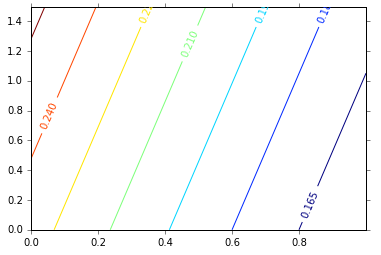

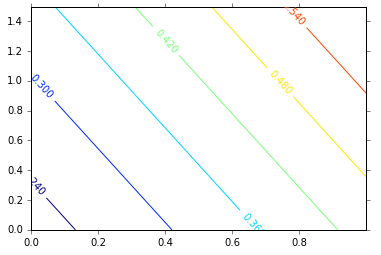

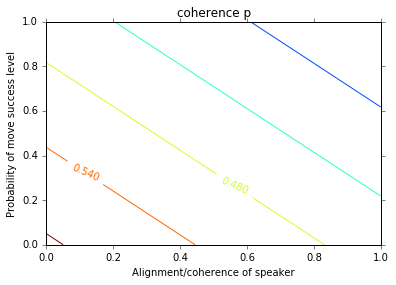

params: -0.191848856727 -0.964846139227 -0.831342920839
0.120464596067
(1000L,) (1000L,) (1000L, 1000L)
params: 0.152282369144 0.0301083012437 -1.01589640129
0.302904312484
(1000L,) (1000L,) (1000L, 1000L)
params: -0.0113682531964 0.514586512073 -0.120574328855
0.594510628105
(1000L,) (1000L,) (1000L, 1000L)


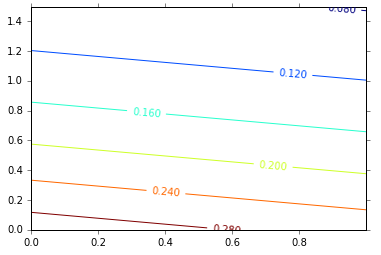

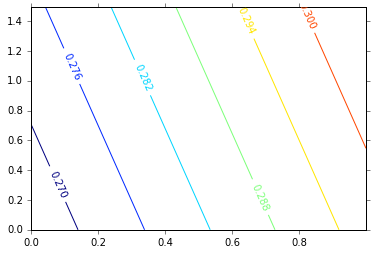

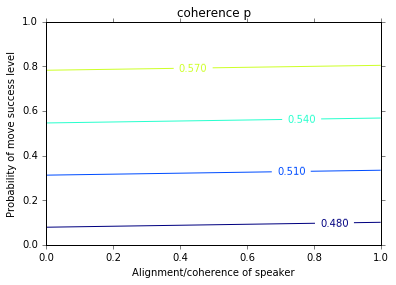

params: -0.454848390478 -0.334472269978 -1.05195312583
0.136900713754
(1000L,) (1000L,) (1000L, 1000L)
params: 0.653073027335 -0.528953599005 -0.970921191514
0.300104190748
(1000L,) (1000L,) (1000L, 1000L)
params: -0.402257639319 0.531353019643 0.0206304664725
0.537361690431
(1000L,) (1000L,) (1000L, 1000L)


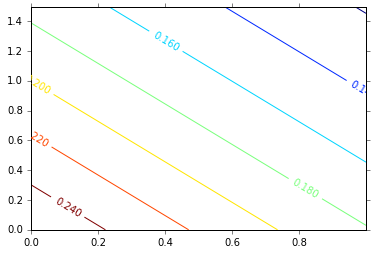

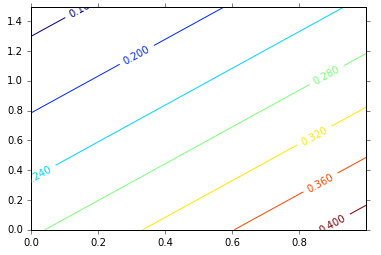

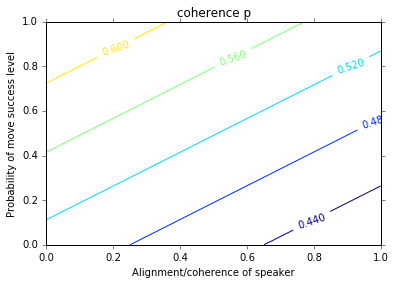

params: -1.03396883837 -0.145771068075 -0.974375322057
0.103947296252
(1000L,) (1000L,) (1000L, 1000L)
params: 0.787909661367 -0.0999601485081 -1.1103823326
0.39593474455
(1000L,) (1000L,) (1000L, 1000L)
params: -0.106837699005 0.018926600059 0.109993031312
0.505520258781
(1000L,) (1000L,) (1000L, 1000L)


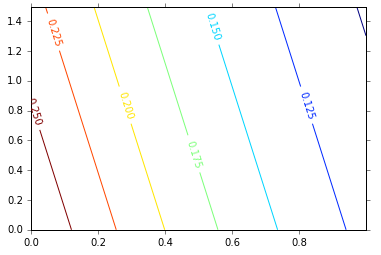

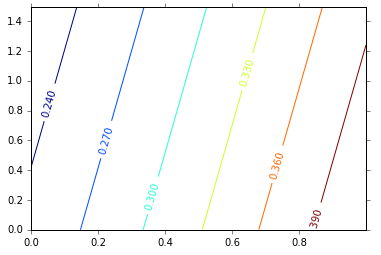

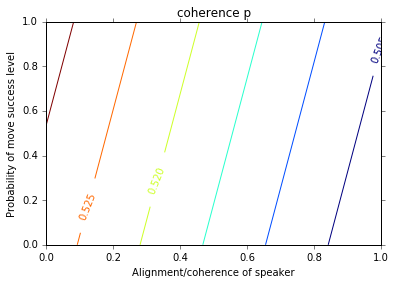

In [26]:
logit = lambda beta_0, beta_1, beta_2: lambda (x, z): float(1)/(1+e**-(beta_0 + (beta_1*x + beta_2*z)))


unif_logit = lambda beta_0: logit(beta_0, 0, 0)

for key, regress in sorted(regress_cond_dict.iteritems()): 
    for i in range(3):
        coef1 = regress.coef_[i, 0]
        coef2 = regress.coef_[i, 1]
        inter = regress.intercept_[i]

        print 'params:', coef1, coef2, inter
        
        range_lo_x = 0
        range_hi_x = 1
        step_size_x = float(range_hi_x - range_lo_x)/1000
        range_lo_z = 0
        range_hi_z = 1.5
        step_size_z = float(range_hi_z - range_lo_z)/1000
        x_ls = np.arange(range_lo_x, range_hi_x, step_size_x)
        z_ls = np.arange(range_lo_z, range_hi_z, step_size_z)
                  
        mesh = np.meshgrid(x_ls, z_ls)
        
        X, Z = mesh
        
        logit_cur_regress = logit(inter, coef1, coef2)
        
        print logit_cur_regress((1,1))
        
        #y_ls = [[logit_cur_regress(x, z)[i]] for x, z in zip(x_ls, z_ls)]
        
        y_ls = logit_cur_regress(mesh)
                
        print np.shape(x_ls), np.shape(z_ls), np.shape(y_ls)
        
        plt.figure()
        CS = plt.contour(X, Z, y_ls)
        plt.clabel(CS, inline=1, fontsize=10)
        
        
        #plt.plot(x_ls, z_ls, 'g-', y_ls, label=str(conv_f_inv(i)))
    plt.axis([range_lo, range_hi, 0, 1])
        #plt.title(key)
    plt.xlabel('Alignment/coherence of speaker')
    plt.ylabel('Probability of move success level')
    plt.title(key_str) 
    plt.legend()
    plt.show()

In [27]:
#goodness-of-fit analysis
# generalised R^2: 1 - (L(0)/L(\theta))^(2/n)

logit = lambda beta_0, beta_1, beta_2: lambda x, z: float(1)/(1+e**-(beta_0 + (beta_1*x + beta_2*z)))


unif_logit = lambda beta_0: logit(beta_0, 0, 0)

#regress_cond_dict
#var_vals, var_succs

for key_str, log_regress in regress_cond_dict.iteritems():
    fitted_inter = log_regress.intercept_
    fitted_coef = log_regress.coef_
    
    print '---', key_str, '---'
    print 'inter: ', fitted_inter
    print 'coef: ', fitted_coef
            
    logit_cur_regress = logit(fitted_inter, fitted_coef[:, 0], fitted_coef[:, 1])
    print logit_cur_regress(1,1)
    unif_logit_cur_regress =unif_logit(fitted_inter)
    
    lex_var = restr_lex_dat[key_str]
    form_var = restr_form_dat[key_str]
    lex_var_vals, lex_var_succs = list(zip(*lex_var))
    form_var_vals, form_var_succs = list(zip(*form_var))


    #incorrect: 0, not_moved: 1, correct: 2
    conv_f = lambda succ_lvl: 0 if succ_lvl == 'incorrect' else (1 if succ_lvl == 'not_moved' else 2)
    conv_f_inv = lambda succ_lvl: 'incorrect' if succ_lvl == 0 else ('not_moved' if succ_lvl == 1 else 'correct')

    var_succs = map(conv_f, lex_var_succs)
    
    n = float(len(lex_var_vals))
    
    
    succ_ps = [lvl_count/n for _, lvl_count in sorted(Counter(var_succs).iteritems(), key=lambda tup: tup[0])]
   
    log_l_0 = sum([log(succ_ps[y]*unif_logit_cur_regress(x, z)[y]) for x, z, y in zip(lex_var_vals, form_var_vals, var_succs)])
    print 'max R^2:', 1-((e**(log_l_0))**(2/n))
    print 'L(0):', log_l_0
    #print logit_cur_regress(0.5)
    log_l_theta = sum([log(succ_ps[y]*logit_cur_regress(x, z)[y]) for x, z, y in zip(lex_var_vals, form_var_vals, var_succs)])
    print 'L(theta):', log_l_theta
    print 'R^2:', 1-((e**(log_l_0 - log_l_theta))**(2/n))
    print

--- alignment e ---
inter:  [-1.20076023 -1.29247076  0.43725604]
coef:  [[-0.52657611  0.10018285]
 [ 1.06044233  0.42848437]
 [-0.62204177 -0.63349272]]
[ 0.16422068  0.54895663  0.30612922]
max R^2: 0.981449302376
L(0): -155.502667432
L(theta): -153.873858099
R^2: 0.0409042273529

--- coherence p ---
inter:  [-0.97437532 -1.11038233  0.10999303]
coef:  [[-1.03396884 -0.14577107]
 [ 0.78790966 -0.09996015]
 [-0.1068377   0.0189266 ]]
[ 0.1039473   0.39593474  0.50552026]
max R^2: 0.981507160894
L(0): -155.624496191
L(theta): -155.257538746
R^2: 0.00936503757363

--- alignment p ---
inter:  [-0.83134292 -1.0158964  -0.12057433]
coef:  [[-0.19184886 -0.96484614]
 [ 0.15228237  0.0301083 ]
 [-0.01136825  0.51458651]]
[ 0.1204646   0.30290431  0.59451063]
max R^2: 0.982252591518
L(0): -157.229115215
L(theta): -155.085514317
R^2: 0.0534808968542

--- coherence e ---
inter:  [-1.05195313 -0.97092119  0.02063047]
coef:  [[-0.45484839 -0.33447227]
 [ 0.65307303 -0.5289536 ]
 [-0.40225764  0.

(160L, 240L)
(160L, 240L)
(160L, 240L)


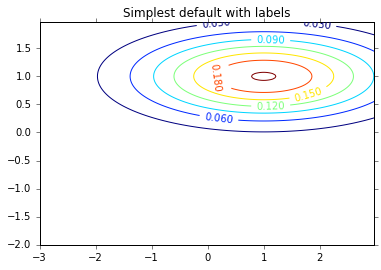

In [11]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
Z2 = mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
# difference of Gaussians
Z = 10.0 * (Z2 - Z1)

print np.shape(X)
print np.shape(Y)
print np.shape(Z1)

plt.figure()
CS = plt.contour(X, Y, Z2)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Simplest default with labels')

In [12]:
x = list(range(5))
y = list(range(5))
print np.meshgrid(x, y)

[array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]]), array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4]])]


In [13]:
coords = np.asarray([(x, y) for x in range(3) for y in range(3)])

b_0, b_1, b_2 = 0, 1, 1

logit = lambda beta_0, beta_1, beta_2: lambda (x, z): float(1)/(1+e**-(beta_0 + (beta_1*x + beta_2*z)))

c_mesh = np.meshgrid(range(3), range(3))

print logit(b_0, b_1, b_2)((1,1))

print logit(b_0, b_1, b_2)(c_mesh)

0.880797077978
[[ 0.5         0.73105858  0.88079708]
 [ 0.73105858  0.88079708  0.95257413]
 [ 0.88079708  0.95257413  0.98201379]]


In [14]:
print 0.1**(2/5)

1.0
